# Dataset Analysis

This notebook is used for analysis of different expression datasets and comparison of their data with individual networks.

# Imports

In [1]:
import pandas as pd
import os
import json
import logging
from tqdm import tqdm
from itertools import product

from venn import venn
import matplotlib.pyplot as plt

from pyenveda.resolver import canonicalize_curies, canonicalize_curie
from utils import create_venn_diagram, get_stats, normalize_nodes, KG_DATA_PATH, DATA_DIR

In [2]:
logger = logging.getLogger(__name__)

# Constants

In [3]:
OPENLINK_NORMALIZED_FILE = 'openbiolink_kg_normalized.tsv'
CUSTOM_NETWORK_NORMALIZED_FILE = 'custom_kg_normalized.tsv'

# Load network

In [4]:
network_1 = pd.read_csv(
    os.path.join(KG_DATA_PATH, 'raw', 'data', 'openbiolink_network.tsv'),
    sep='\t'
)
network_1['source'] = network_1['source'].apply(lambda x: 
                                                  f'{x.split(":")[0].lower()}:{x.split(":")[1]}')
network_1['target'] = network_1['target'].apply(lambda x: 
                                                  f'{x.split(":")[0].lower()}:{x.split(":")[1]}')

network_1 = normalize_nodes(network_df=network_1, file_name=OPENLINK_NORMALIZED_FILE)

network_1

,source,target,relation
0,pubchem.compound:1,ncbigene:3162,1
1,pubchem.compound:1,ncbigene:3308,1
2,pubchem.compound:1,ncbigene:4804,1
3,pubchem.compound:1,ncbigene:1020,-1
4,pubchem.compound:1,ncbigene:54205,-1
...,...,...,...
74872,ncbigene:999,ncbigene:4233,-1
74873,ncbigene:999,ncbigene:5594,-1
74874,ncbigene:999,ncbigene:5595,-1
74875,ncbigene:9990,mondo:0000902,1


In [5]:
network_2 = pd.read_csv(
    os.path.join(KG_DATA_PATH, 'raw', 'data', 'custom_network.tsv'),
    sep='\t',
    usecols=['source', 'target', 'relation']
)
network_2['source'] = network_2['source'].apply(lambda x: 
                                                  f'{x.split(":")[0].lower()}:{x.split(":")[1]}')
network_2['target'] = network_2['target'].apply(lambda x: 
                                                  f'{x.split(":")[0].lower()}:{x.split(":")[1]}')

network_2 = normalize_nodes(network_df=network_2, file_name=CUSTOM_NETWORK_NORMALIZED_FILE)
network_2

,source,target,relation
0,pubchem.compound:4943,ncbigene:2562,1
1,pubchem.compound:1110,ncbigene:7915,-1
2,pubchem.compound:667468,ncbigene:147,-1
3,pubchem.compound:2663,ncbigene:154,1
4,pubchem.compound:4008,ncbigene:779,-1
...,...,...,...
59263,ncbigene:653361,mondo:0018305,1
59264,ncbigene:653361,mondo:0009309,1
59265,ncbigene:727897,mondo:0008345,1
59266,ncbigene:729238,mondo:0008345,1


# Get chemical, protein, disease data

In [6]:
# Gene
gene_source_df = set(network_1[network_1['source'].str.contains('ncbigene')]['source'])
gene_target_df = set(network_1[network_1['target'].str.contains('ncbigene')]['target'])

genes_1 = gene_source_df.union(gene_target_df)

# Chemical - protein
chemicals_1 = set(network_1[network_1['source'].str.contains('pubchem.compound')]['source'])

# Protein - disease
diseases_1 = set(network_1[network_1['target'].str.contains('mondo')]['target'])

len(chemicals_1), len(diseases_1), len(genes_1)

(7407, 1505, 6518)

In [7]:
gene_source_df = set(network_2[network_2['source'].str.contains('ncbigene')]['source'])
gene_target_df = set(network_2[network_2['target'].str.contains('ncbigene')]['target'])

genes_2 = gene_source_df.union(gene_target_df)

# Chemical - protein
chemicals_2 = set(network_2[network_2['source'].str.contains('pubchem.compound')]['source'])
        
# Protein - disease
diseases_2 = set(network_2[network_2['target'].str.contains('mondo')]['target'])

len(diseases_2), len(chemicals_2), len(genes_2)

(2715, 1164, 8272)

In [8]:
kg_chemicals = chemicals_1.union(chemicals_2)
print('Chemicals -', len(kg_chemicals))

kg_diseases = diseases_1.union(diseases_2)
print('Diseases -', len(kg_diseases))

kg_genes = genes_1.union(genes_2)
print('Genes -', len(kg_genes))

10062

# Saving network chemcials and diseases

In [9]:
with open(os.path.join(KG_DATA_PATH, 'normalized', 'data.json'), 'w', encoding='utf-8') as f:
    expression_data = {
        'chemicals': list(kg_chemicals),
        'diseases': list(kg_diseases),
        'gene': list(kg_genes),
    }
    json.dump(expression_data, f, ensure_ascii=False, indent=2)

# Network analysis

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.fo

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Carian' (NotoSansCarian-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXVariants' (STIXVar.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font '.SF Compact' (SFCompact.ttf) normal normal 1000 normal>) = 10.62
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Trattatello' (Trattatello.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Phoenician' (NotoSansPhoenician-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Syriac' (NotoSansSyriac-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lao Sangam MN' (Lao Sangam MN.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Unicode MS' (Arial Unicode.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeOneSym' (STIXSizOneSymReg.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmBol.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lisu' (NotoSansLisu-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cham' (NotoSansCham-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Hanifi Rohingya' (NotoSansHanifiRohingya-Reg

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Javanese' (NotoSansJavanese-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gurmukhi Sangam MN' (Gurmukhi Sangam MN.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Buginese' (NotoSansBuginese-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Sora Sompeng' (NotoSansSoraSompeng-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Rounded MT Bold' (Arial Rounded Bold.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Diwan Kufi' (Diwan Kufi.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (Georgia.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans New Tai Lue' (No

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial' (Arial Italic.ttf) italic normal 400 normal>) = 7.413636363636363
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Mongolian' (NotoSansMongolian-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AppleGothic' (AppleGothic.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Academy Engraved LET' (Academy Engraved LET Fonts.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kailasa' (Kailasa.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Brush Script MT' (Brush Script.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Chalkboard' (Chalkboard.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Pahawh Hmong' (NotoSansPahawhHmong-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cypriot' (NotoSansCypriot-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Didot' (Didot.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Helvetica' (Helvetica.ttc) normal normal 400 normal>) = 7.322727272727273
DEBUG:matplo

DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal normal 400 normal>) = 0.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmb10' (cmb10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSize

DEBUG:matplotlib.font_manager:findfont: score(<Font '.SF Compact' (SFCompact.ttf) normal normal 1000 normal>) = 10.62
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Trattatello' (Trattatello.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Phoenician' (NotoSansPhoenician-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Syriac' (NotoSansSyriac-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lao Sangam MN' (Lao Sangam MN.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bangla MN' (Bangla MN.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Devanagari MT' (DevanagariMT.ttc) normal normal 400 normal>) = 10.05
DEBU

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Bamum' (NotoSansBamum-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsUpSm' (STIXIntUpSmBol.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Lisu' (NotoSansLisu-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cham' (NotoSansCham-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'PingFang HK' (PingFang.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Hanifi Rohingya' (NotoSansHanifiRohingya-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Miao' (NotoSansMiao-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Herculanum' (Herculanum.

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Buginese' (NotoSansBuginese-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Sora Sompeng' (NotoSansSoraSompeng-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Arial Rounded MT Bold' (Arial Rounded Bold.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Diwan Kufi' (Diwan Kufi.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (Georgia.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans New Tai Lue' (NotoSansNewTaiLue-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Farisi' (Farisi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Syloti Nagri' (NotoSansSylotiNagri-R

DEBUG:matplotlib.font_manager:findfont: score(<Font 'AppleGothic' (AppleGothic.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXIntegralsUp' (STIXIntUpReg.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Academy Engraved LET' (Academy Engraved LET Fonts.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 900 normal>) = 10.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Bhaiksuki' (NotoSansBhaiksuki-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Heiti TC' (STHeiti Medium.ttc) normal normal 400 normal

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Pahawh Hmong' (NotoSansPahawhHmong-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Noto Sans Cypriot' (NotoSansCypriot-Regular.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Didot' (Didot.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Wingdings 3' (Wingdings 3.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Helvetica' (Helvetica.ttc) normal normal 400 normal>) = 7.322727272727273
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.otf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Apple Symbols' (Apple Symbols.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Damascus' (Damascus.ttc) normal normal 400 normal>) = 10.05


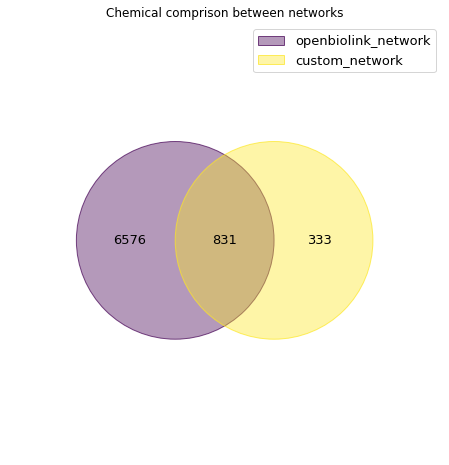

In [10]:
network_chemical_comparison = {
    'openbiolink_kg': chemicals_1,
    'custom_kg': chemicals_2,
}

# Get venn graph
plt = create_venn_diagram(data_dict=network_chemical_comparison, plot_title='Chemical comprison between KGs')
plt.show()

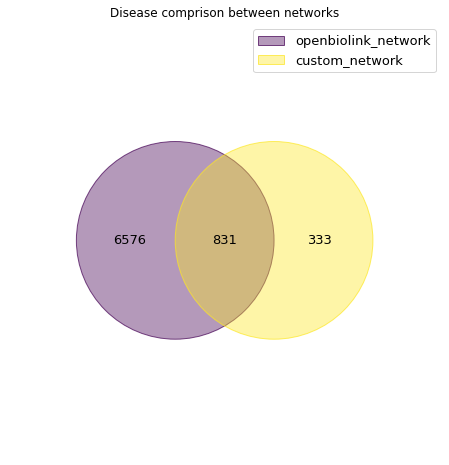

In [11]:
network_disease_comparison = {
    'openbiolink_kg': diseases_1,
    'custom_kg': diseases_2,
}

# Get venn graph
plt = create_venn_diagram(data_dict=network_chemical_comparison, plot_title='Disease comprison between KGs')
plt.show()

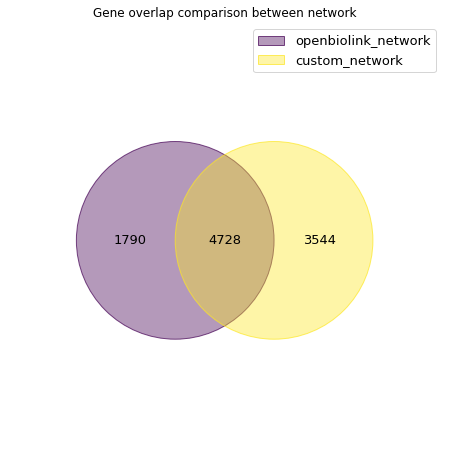

In [12]:
network_gene_comparison = {
    'openbiolink_kg': genes_1,
    'custom_kg': genes_2,
}

# Get venn graph
plt = create_venn_diagram(data_dict=network_gene_comparison, plot_title='Gene overlap comparison between KGs')
plt.show()

In [13]:
kg_1 = {
    'disease': diseases_1,
    'chemical': chemicals_1
}

kg_2 = {
    'disease': diseases_2,
    'chemical': chemicals_2
}

# Open target

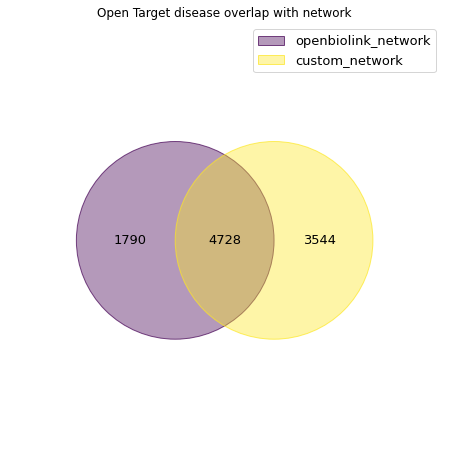

In [14]:
with open(os.path.join(DATA_DIR, 'open_targets', 'normalized', 'disease_expression.json')) as f2:
    target_diseases = set(json.load(f2).keys())

target_disease_comparision = {
    'network': kg_diseases,
    'open target': target_diseases
}

# Get venn graph
plt = create_venn_diagram(data_dict=network_gene_comparison, plot_title='Open Target disease overlap with KG')
plt.show()

In [15]:
# Get overlapping stats
get_stats(network_1=kg_1, network_2=kg_2, disease_set=target_diseases)

INFO:utils:No.of elements are: 180
INFO:utils:No.of elements overlaping with OpenBio network are: 47
INFO:utils:No.of elements overlaping with Custom network are: 60


# CREED dataset

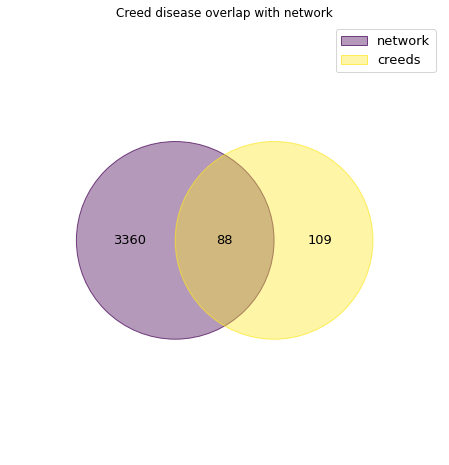

In [16]:
with open(os.path.join(DATA_DIR, 'creeds', 'normalized', 'chemical_expression.json')) as f1:
    creed_chemicals = set(json.load(f1).keys())

with open(os.path.join(DATA_DIR, 'creeds', 'normalized', 'disease_expression.json')) as f2:
    creed_diseases = set(json.load(f2).keys())

creed_chem_comparision = {
    'network': kg_chemicals,
    'creeds': creed_chemicals
}

creed_disease_comparision = {
    'network': kg_diseases,
    'creeds': creed_diseases
}

# Get venn graph
plt = create_venn_diagram(data_dict=creed_disease_comparision, plot_title='Creed disease overlap with KG')
plt.show()

In [17]:
# Get overlapping stats
get_stats(network_1=kg_1, network_2=kg_2, disease_set=creed_diseases)

INFO:utils:No.of elements are: 197
INFO:utils:No.of elements overlaping with OpenBio network are: 52
INFO:utils:No.of elements overlaping with Custom network are: 70


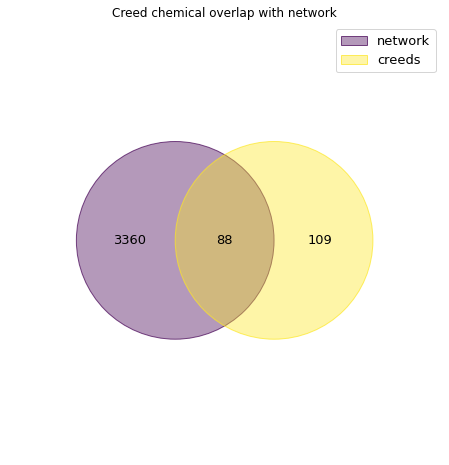

In [18]:
# Create venn diagram
plt = create_venn_diagram(data_dict=creed_disease_comparision, plot_title='Creed chemical overlap with KG')
plt.show()

In [19]:
# Get stats
get_stats(network_1=kg_1, network_2=kg_2, chemical_set=creed_chemicals)

INFO:utils:No.of elements overlaping with OpenBio network are: 96
INFO:utils:No.of elements overlaping with Custom network are: 55


# GEO dataset

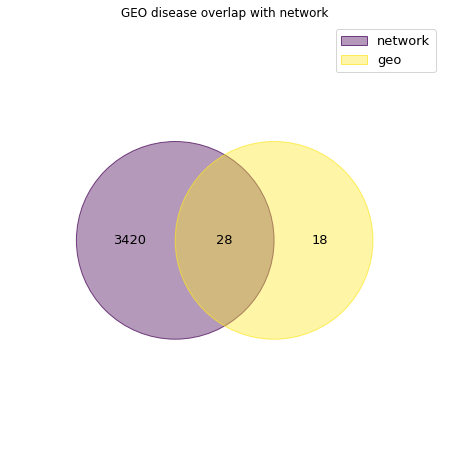

In [20]:
with open(os.path.join(DATA_DIR, 'GEO', 'normalized', 'disease_expression.json')) as f2:
    geo_diseases = set(json.load(f2).keys())

geo_disease_comparision = {
    'network': kg_diseases,
    'geo': geo_diseases
}

# Create venn diagram
plt = create_venn_diagram(data_dict=geo_disease_comparision, plot_title='GEO disease overlap with KG')
plt.show()

In [21]:
# Get stats
get_stats(network_1=kg_1, network_2=kg_2, disease_set=geo_diseases)

INFO:utils:No.of elements are: 46
INFO:utils:No.of elements overlaping with OpenBio network are: 18
INFO:utils:No.of elements overlaping with Custom network are: 23


# L1000

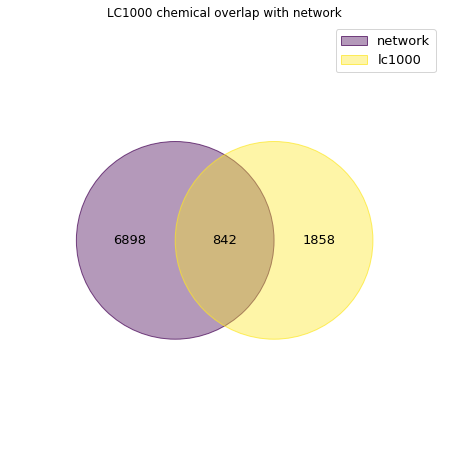

In [22]:
with open(os.path.join(DATA_DIR, 'l1000', 'normalized', 'chemical_expression.json')) as f2:
    l1000_chemicals = set(json.load(f2).keys())

lc1000_chemical_comparision = {
    'network': kg_chemicals,
    'l1000': l1000_chemicals
}

# Create venn diagram
plt = create_venn_diagram(data_dict=l1000_chemical_comparision, plot_title='L1000 chemical overlap with KG')
plt.show()

In [23]:
# Get stats
get_stats(network_1=kg_1, network_2=kg_2, chemical_set=l1000_chemicals)

INFO:utils:No.of elements overlaping with OpenBio network are: 804
INFO:utils:No.of elements overlaping with Custom network are: 292
